In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np




In [2]:
# Set paths for relevant CSV files

covid_data_path = "resources/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time_-_ARCHIVED.csv"
state_code_path = "resources/US-2-letter-state-code.csv"
state_pop_path = "resources/state_population.csv"


# Import files as Pandas dataframes

covid_data_df = pd.read_csv(covid_data_path)
state_code_df = pd.read_csv(state_code_path)
state_pop_df = pd.read_csv(state_pop_path)

# View covid_data file 

covid_data_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0,03/12/2021 03:20:13 PM,Agree,NaN
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/02/2021 02:35:20 PM,Agree,Not agree
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,01/03/2022 03:18:16 PM,NaN,NaN
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0,11/22/2021 12:00:00 AM,Agree,Agree
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,05/31/2022 01:20:20 PM,NaN,NaN


# Data Cleaning (Laura, Rafia & Amjad)

In [3]:
# Drop rows in dataframe that aren't needed for our project

clean_df = covid_data_df.drop(columns=["created_at", "consent_cases", "consent_deaths"])
clean_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [4]:
#Rename columns so they are more legible to readers

clean_df = clean_df.rename(columns={"submission_date":"Submission Date", "state":"State", "tot_cases":"Total Cases",
                        "conf_cases":"Confirmed Cases", "prob_cases":"Probable Cases", "new_case":"New Cases",
                        "pnew_case":"Probable New Cases", "tot_death":"Total Deaths", "conf_death":"Confirmed Deaths",
                        "prob_death": "Probable Deaths", "new_death":"New Deaths", "pnew_death":"Probable New Deaths"})
clean_df.head()

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
0,03/11/2021,KS,297229,241035.0,56194.0,0,0.0,4851,NaN,NaN,0,0.0
1,12/01/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0
2,01/02/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
4,05/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0


In [5]:
# Drop rows that are populated with NaNs and incomplete data 

clean_df = clean_df.dropna(how='any')
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [7]:
# Make NYC and NY into one column 

clean_df['State'] = clean_df['State'].replace({'NYC': 'NY'})
clean_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
5,05/17/2020,RMI,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
7,09/04/2021,PR,173967,144788.0,29179.0,667,274.0,2911,2482.0,429.0,8,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60048,09/25/2021,RMI,4,4.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [8]:
# eliminate US territories from the 'State' column 

filtered_df = clean_df[(clean_df['State'] != "AS") & (clean_df['State'] != "RMI") &
                      (clean_df['State'] != "PR") & (clean_df['State'] != "PW") & 
                      (clean_df['State'] != "GU") & (clean_df['State'] != "MP") &
                      (clean_df['State'] != "FSM") & (clean_df['State'] != "VI")]
filtered_df



,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
3,11/22/2021,AL,841461,620483.0,220978.0,703,357.0,16377,12727.0,3650.0,7,3.0
10,01/01/2022,UT,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0
12,04/03/2021,OH,1024011,866822.0,157189.0,2293,552.0,18646,18646.0,0.0,0,0.0
13,10/16/2022,NY,2908749,2452178.0,456571.0,5934,1266.0,42158,36503.0,5655.0,8,-1.0
19,07/26/2021,OK,475578,373929.0,101649.0,1028,264.0,7488,6379.0,1109.0,8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
60038,04/17/2021,AL,521608,407075.0,114533.0,258,75.0,11110,8878.0,2232.0,7,2.0
60044,09/04/2022,MS,913049,492258.0,420791.0,0,0.0,12794,8425.0,4369.0,0,0.0
60046,02/20/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0
60058,06/17/2020,MS,24223,24038.0,185.0,521,6.0,1191,1172.0,19.0,9,0.0


In [9]:
# Sort by Submission Date

filtered_df["Submission Date"].sort_values(ascending=True)

sorted_date_df = filtered_df.sort_values("Submission Date", ascending=True)
sorted_date_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths
16101,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0
31377,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0
19276,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0
57083,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0
29461,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47538,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0
9900,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0
29548,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0
46704,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0


In [10]:
# Tidy up State Name/Code dataset

state_code_df =  state_code_df.rename(columns={"state_name":"State Name", "state_code":"State"}) 
state_code_df.head()

,State Name,State
0,Alabama,AL
1,Alaska,AK
2,American Samoa,AS
3,Arizona,AZ
4,Arkansas,AR


In [11]:
# Create State Name/State Color dataset

data = {
    'State Name': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 
              'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 
              'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 
              'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 
              'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 
              'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 
              'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
    'State Color': ['Red', 'Red', 'Blue', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 
              'Red', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue',
              'Blue', 'Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue', 'Blue',
              'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red',
              'Blue', 'Blue', 'Blue', 'Red', 'Blue', 'Red']
}
    
    
state_color_df = pd.DataFrame(data)
state_color_df.head()

,State Name,State Color
0,Alabama,Red
1,Alaska,Red
2,Arizona,Blue
3,Arkansas,Red
4,California,Blue


In [12]:
# Merge datasets

temp_state_df = pd.merge(state_color_df, state_code_df,
                                 how='left', on='State Name')
temp_state_df.head()

,State Name,State Color,State
0,Alabama,Red,AL
1,Alaska,Red,AK
2,Arizona,Blue,AZ
3,Arkansas,Red,AR
4,California,Blue,CA


In [13]:
# Merge new dataset with main dataset

final_df = pd.merge(sorted_date_df, temp_state_df,
                                 how='left', on='State')
final_df

,Submission Date,State,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,WI,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,OR,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,IL,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,OH,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,MT,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,MA,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,AL,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,NJ,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,CO,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [14]:
# Eliminate "State" column since we want to be working with State Name, not State Code 

final2_df = final_df.drop(columns=["State"])
final2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue


In [15]:
# Create "Blue Cases" and "Red Cases" columns and set them equal to "Total Cases" 

final2_df["Blue Cases"] = final2_df["Total Cases"]
final2_df["Red Cases"] = final2_df["Total Cases"]

# Set the inapplicable Cases column to 0

final2_df.loc[final2_df['State Color'] == "Red", 'Blue Cases'] = 0
final2_df.loc[final2_df['State Color'] == "Blue", 'Red Cases'] = 0
final2_df


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0


# Bar Plot Visualizations, Total Cases (Laura & Rafia)

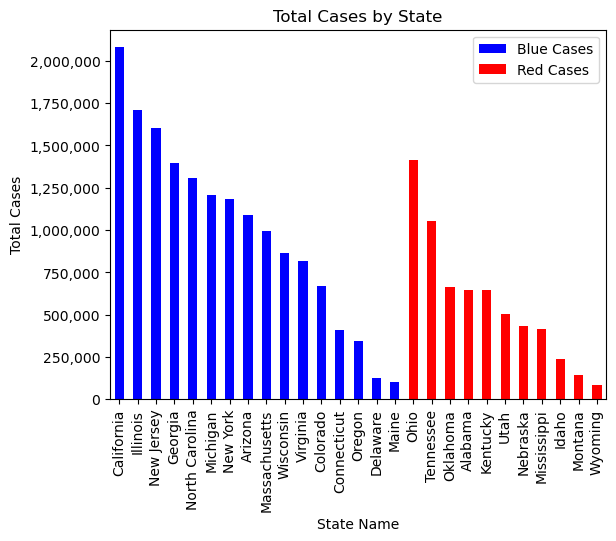

In [17]:
# Chart Total Cases by State

mean_final = final2_df.groupby("State Name")[["Blue Cases", "Red Cases"]].mean(numeric_only=True)
mean_final_df = mean_final.sort_values(by=["Blue Cases", "Red Cases"], ascending=False)

colors=["blue","red"]

mean_final_df.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                   stacked=True,
                     title="Total Cases by State",
                  color=colors)

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()

In [18]:
# Create smaller dataset to help with next plots 

mean_final2_df = final2_df.groupby("State Name")[["Blue Cases", "Red Cases", "Total Cases"]].mean(numeric_only=True)
mean_final2_df.head()

,Blue Cases,Red Cases,Total Cases
State Name,,,
Alabama,0.000000e+00,648385.127872,6.483851e+05
Arizona,1.089567e+06,0.000000,1.089567e+06
California,2.079904e+06,0.000000,2.079904e+06
Colorado,6.698942e+05,0.000000,6.698942e+05
Connecticut,4.083576e+05,0.000000,4.083576e+05


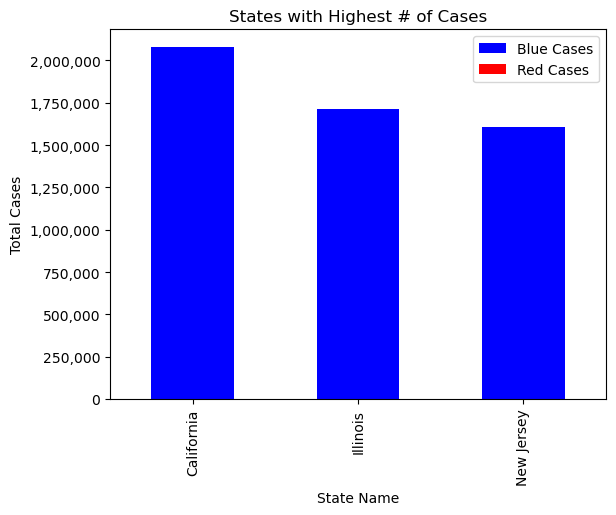

In [19]:
# Plot Top 3 States with Highest # of Cases

# Sort by Total Cases 
mean_final2_df = mean_final2_df.sort_values(by="Total Cases", ascending=False)

# Create new dataframe with only Top 3
top_three_states = mean_final2_df.head(3).reset_index()

# Plot Chart
colors=["blue","red"]

top_three_states.plot(kind="bar",
                      x="State Name",
                      y=["Blue Cases", "Red Cases"],
                      stacked=True,
                      color=colors)

plt.xlabel("State Name")
plt.ylabel("Total Cases")
plt.title("States with Highest # of Cases")
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()

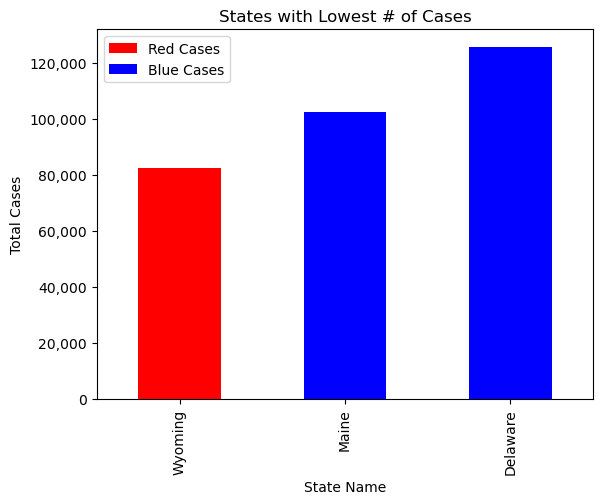

In [20]:
# Plot Bottom 3 States with Lowest # of Cases

# sort by Total Cases
mean_final3_df = mean_final2_df.sort_values(by="Total Cases", ascending=True)

# Create new dataframe with only Bottom 3
bottom_three_states = mean_final3_df.head(3).reset_index()

# Plot Chart
colors = ["red", "blue"]

bottom_three_states.plot(kind="bar",
                      x="State Name",
                      y=["Red Cases", "Blue Cases"],
                      stacked=True,
                      color=colors)

plt.xlabel("State Name")
plt.ylabel("Total Cases")
plt.title("States with Lowest # of Cases")
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()

In [21]:
# Create Red States only Dataframe

red_states_df = final2_df[final2_df["State Color"]=='Red']
red_states_df


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555
5,01/01/2021,365618,298117.0,67501.0,3621,335.0,7273,5981.0,1292.0,83,19.0,Alabama,Red,0,365618
10,01/01/2021,279722,279722.0,0.0,3110,0.0,1278,1252.0,26.0,9,1.0,Utah,Red,0,279722
11,01/01/2021,585072,514429.0,70643.0,9159,1920.0,6907,5990.0,917.0,97,30.0,Tennessee,Red,0,585072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24089,12/31/2021,708938,530961.0,177977.0,0,0.0,11555,8792.0,2763.0,0,0.0,Oklahoma,Red,0,708938
24091,12/31/2021,543737,309859.0,233878.0,0,0.0,10450,6993.0,3457.0,0,0.0,Mississippi,Red,0,543737
24092,12/31/2021,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,Utah,Red,0,636992
24093,12/31/2021,342939,252799.0,90140.0,2107,930.0,3341,2783.0,558.0,0,0.0,Nebraska,Red,0,342939


In [22]:
# Create Blue States only Dataframe

blue_states_df = final2_df[final2_df["State Color"]=='Blue']
blue_states_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0
6,01/01/2021,350126,331664.0,18462.0,2825,221.0,4873,4221.0,652.0,59,6.0,Colorado,Blue,350126,0
7,01/01/2021,591739,543597.0,48142.0,2011,166.0,13916,13131.0,785.0,100,7.0,Michigan,Blue,591739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,12/31/2021,1562082,1284818.0,277264.0,0,0.0,35389,30177.0,5212.0,0,0.0,New York,Blue,1562082,0
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0


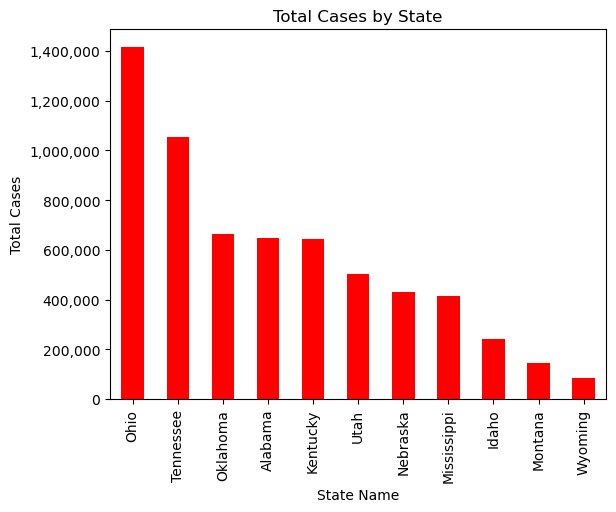

In [23]:
# Plot Total Cases by Red State bar chart

# Group by State Name & Avg. Total Cases
red_states_2 = red_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

# Sort in Descending Order
red_states_mean = red_states_2.sort_values(ascending=False)

# Plot chart 
red_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="r")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()




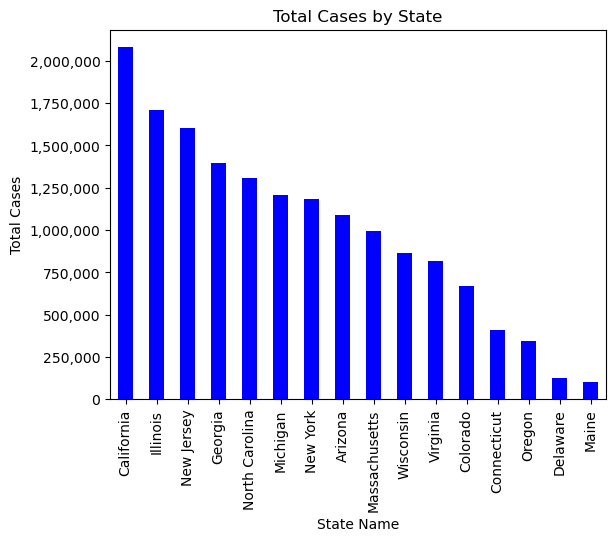

In [24]:

# Plot Total Cases by Blue State bar chart

# Group by State Name & Avg. Total Cases
blue_states_2 = blue_states_df.groupby("State Name").mean(numeric_only=True)["Total Cases"]

# Sort in Descending Order
blue_states_mean = blue_states_2.sort_values(ascending=False)

# Plot chart 
blue_states_mean.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Total Cases",
                     title="Total Cases by State",
                    color="b")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()


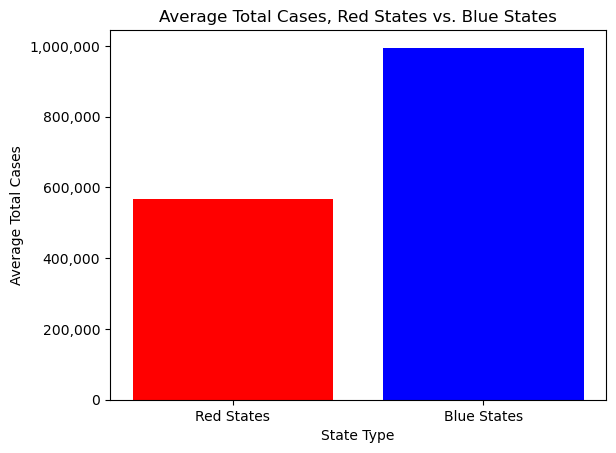

In [25]:
# Create Average Total Cases by Red and Blue States chart

# Find average number of total cases for State Color 

red_states_avg = red_states_mean.mean()
blue_states_avg = blue_states_mean.mean()

# Create a bar plot comparing the averages
averages = {"Red States": red_states_avg, "Blue States": blue_states_avg}
colors = ["r", "b"]

plt.bar(averages.keys(), averages.values(), color=colors)
plt.xlabel("State Type")
plt.ylabel("Average Total Cases")
plt.title("Average Total Cases, Red States vs. Blue States")

plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)

plt.show()



# Data Cleaning & Visualization, Case Prevalence (Laura & Rafia)

In [26]:
#Clean up State Population dataframe

population_df = state_pop_df.drop(columns=["Unnamed: 2", "Unnamed: 3"])
population_df = population_df.rename(columns={"STATE":"State Name", "POP ESTIMATE 2021":"State Population"})
population_df.head()

,State Name,State Population
0,Alabama,5049846
1,Alaska,734182
2,Arizona,7264877
3,Arkansas,3028122
4,California,39142991


In [27]:
# Merge with main Dataframe

pop_state_df = pd.merge(final2_df, population_df,
                                 how='left', on='State Name')
pop_state_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460,5049846
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297


In [28]:
# Create a new dataframe for red state population
red_pop_state_df = pop_state_df[pop_state_df["State Color"]=="Red"]

# Calculate Case/Population Percentage for Red States
red_case_pop_pct = 100 * (red_pop_state_df["Red Cases"])/(red_pop_state_df["State Population"])

# Create Case/Population Percentage column
red_pop_state_df["Case/Population Percentage"] = red_case_pop_pct
red_pop_state_df


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8172\4041552075.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red_pop_state_df["Case/Population Percentage"] = red_case_pop_pct


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342,5.953414
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227,7.372357
5,01/01/2021,365618,298117.0,67501.0,3621,335.0,7273,5981.0,1292.0,83,19.0,Alabama,Red,0,365618,5049846,7.240181
10,01/01/2021,279722,279722.0,0.0,3110,0.0,1278,1252.0,26.0,9,1.0,Utah,Red,0,279722,3339113,8.377135
11,01/01/2021,585072,514429.0,70643.0,9159,1920.0,6907,5990.0,917.0,97,30.0,Tennessee,Red,0,585072,6968351,8.396133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24089,12/31/2021,708938,530961.0,177977.0,0,0.0,11555,8792.0,2763.0,0,0.0,Oklahoma,Red,0,708938,3991225,17.762416
24091,12/31/2021,543737,309859.0,233878.0,0,0.0,10450,6993.0,3457.0,0,0.0,Mississippi,Red,0,543737,2949586,18.434350
24092,12/31/2021,636992,636992.0,0.0,0,0.0,3787,3635.0,152.0,0,0.0,Utah,Red,0,636992,3339113,19.076683
24093,12/31/2021,342939,252799.0,90140.0,2107,930.0,3341,2783.0,558.0,0,0.0,Nebraska,Red,0,342939,1963554,17.465219


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8172\306491050.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  red_pop_state = red_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]


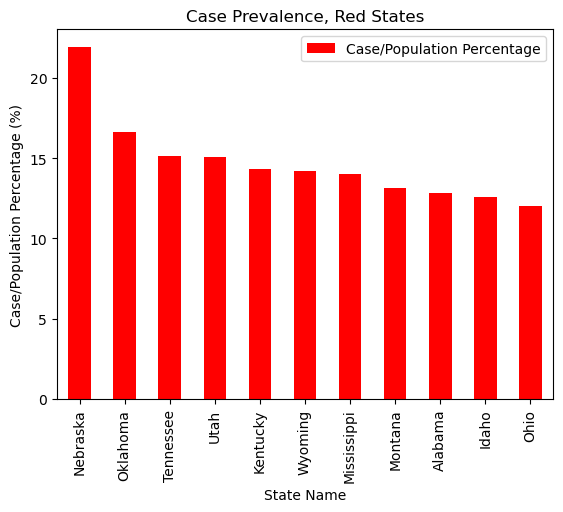

In [29]:
#Plot Case Prevalence for Red States 

red_pop_state = red_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]
red_pop_state = pd.DataFrame(red_pop_state)
red_pop_state2 = red_pop_state.sort_values(by=["Case/Population Percentage"], ascending=False)


red_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Case Prevalence, Red States",
                    color="r")
plt.show()




In [30]:
# Create a new dataframe for blue state population

blue_pop_state_df = pop_state_df[pop_state_df["State Color"]=="Blue"]

# Calculate Case/Population Percentage for Blue States

blue_case_pop_pct = 100 * (blue_pop_state_df["Blue Cases"])/(blue_pop_state_df["State Population"])

# Create Case/Population Percentage column

blue_pop_state_df["Case/Population Percentage"] = blue_case_pop_pct
blue_pop_state_df


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8172\2376892509.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  blue_pop_state_df["Case/Population Percentage"] = blue_case_pop_pct


,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101,8.886293
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301,2.676244
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469,7.593831
6,01/01/2021,350126,331664.0,18462.0,2825,221.0,4873,4221.0,652.0,59,6.0,Colorado,Blue,350126,0,5811297,6.024920
7,01/01/2021,591739,543597.0,48142.0,2011,166.0,13916,13131.0,785.0,100,7.0,Michigan,Blue,591739,0,10037504,5.895280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24098,12/31/2021,1562082,1284818.0,277264.0,0,0.0,35389,30177.0,5212.0,0,0.0,New York,Blue,1562082,0,19857492,7.866462
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690,16.318521
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961,16.878071
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297,16.479901


C:\Users\Ryzen\AppData\Local\Temp\ipykernel_8172\3653225942.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  blue_pop_state = blue_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]


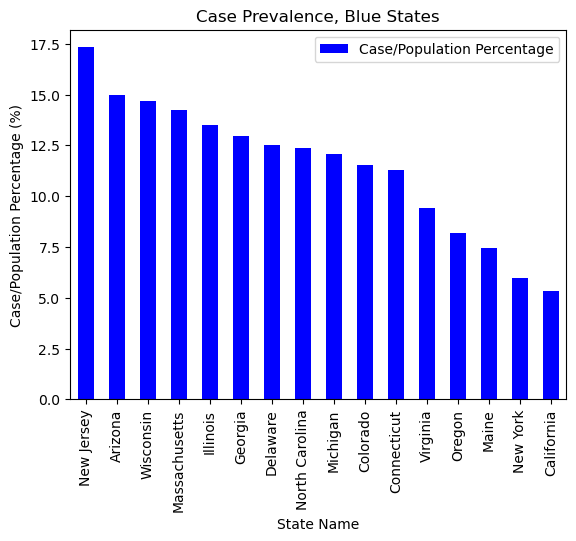

In [31]:
# Chart Blue State Prevalence 

blue_pop_state = blue_pop_state_df.groupby("State Name").mean()["Case/Population Percentage"]
blue_pop_state = pd.DataFrame(blue_pop_state)
blue_pop_state2 = blue_pop_state.sort_values(by=["Case/Population Percentage"], ascending=False)

blue_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Case Prevalence, Blue States",
                    color="b")
plt.show()




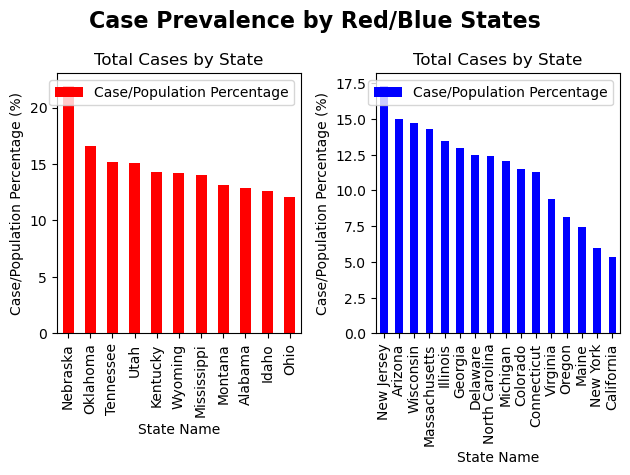

In [33]:
# Generate a side by side plot of Red vs. Blue State Case Prevalence 

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Case Prevalence by Red/Blue States", fontsize=16, fontweight="bold")

red_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="r",
                  ax=ax1)
               

blue_pop_state2.plot(kind = "bar",
                    xlabel="State Name",
                    ylabel="Case/Population Percentage (%)",
                     title="Total Cases by State",
                    color="b",
                   ax=ax2)
                

fig.tight_layout()
plt.show()

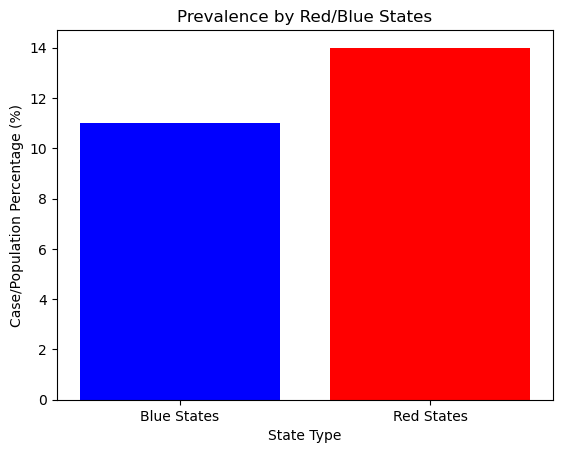

In [34]:
# Generate a plot of Case Prevalence by Red and Blue States 

fig, ax = plt.subplots()

blue_avg_cases = int(blue_pop_state2.mean())
red_avg_cases = int(red_pop_state2.mean())

ax.bar(["Blue States", "Red States"], [blue_avg_cases, red_avg_cases], color=["b", "r"])

ax.set_xlabel("State Type")
ax.set_ylabel("Case/Population Percentage (%)")
ax.set_title("Prevalence by Red/Blue States")

plt.show()

In [35]:
#Create a new dataframe with Case/Population Percentage for all states

state_case_pop_pct = 100 * (pop_state_df["Total Cases"])/(pop_state_df["State Population"])

pop_state_df["Case/Population Percentage"] = state_case_pop_pct
pop_state2_df = pop_state_df
pop_state2_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101,8.886293
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301,2.676244
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469,7.593831
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342,5.953414
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227,7.372357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690,16.318521
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460,5049846,17.910645
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961,16.878071
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297,16.479901


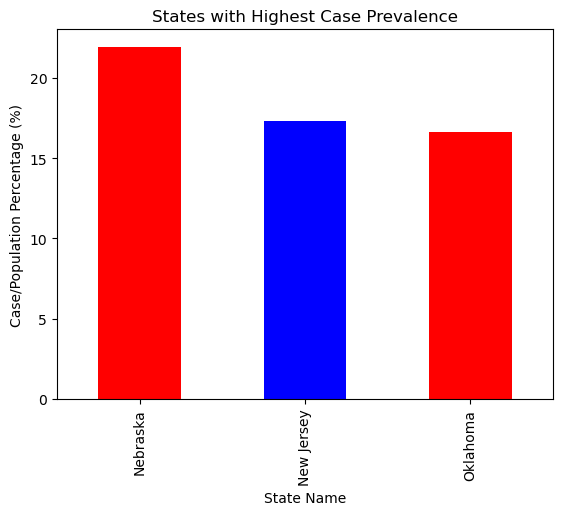

In [36]:
# Plot 3 states with Highest Case Prevalence 

pop_state2_df = pop_state2_df.groupby("State Name").mean(numeric_only=True)

pop_state2_df = pop_state2_df.sort_values(by="Case/Population Percentage", ascending=False)

top_three_pop_states = pop_state2_df.head(3).reset_index()

colors = ["red", "blue", "red"]

top_three_pop_states.plot(kind="bar",
                          x="State Name",
                          y="Case/Population Percentage",
                          stacked=True,
                          color=colors,
                         legend=False)

plt.xlabel("State Name")
plt.ylabel("Case/Population Percentage (%)")
plt.title("States with Highest Case Prevalence")
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()

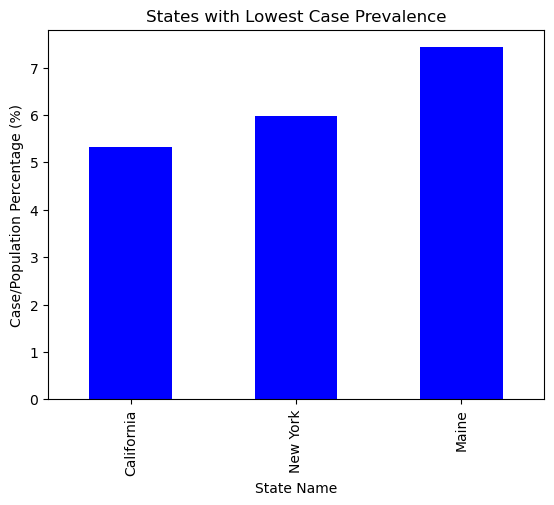

In [37]:
# Plot 3 states with Highest Case Prevalence 

pop_state2_df = pop_state2_df.groupby("State Name").mean(numeric_only=True)

pop_state2_df = pop_state2_df.sort_values(by="Case/Population Percentage", ascending=True)

top_three_pop_states = pop_state2_df.head(3).reset_index()

colors = ["blue"]

top_three_pop_states.plot(kind="bar",
                          x="State Name",
                          y="Case/Population Percentage",
                          stacked=True,
                          color=colors,
                         legend=False)

plt.xlabel("State Name")
plt.ylabel("Case/Population Percentage (%)")
plt.title("States with Lowest Case Prevalence")
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.show()

# Statistical Analysis (Rafia & Amjad)


In [38]:

# Extract the 'Blue Cases' and 'Red Cases' columns from the DataFrame
blue_cases = blue_pop_state_df['Blue Cases']
red_cases = red_pop_state_df['Red Cases']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(blue_cases, red_cases)

# Print the t-statistic and p-value
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  33.592271324857755
p-value:  8.142141668872524e-242


In [39]:

# Extract the 'Blue Cases' and 'Red Cases' columns from the DataFrame
blue_cases = blue_pop_state_df['Case/Population Percentage']
red_cases = red_pop_state_df['Case/Population Percentage']

# Perform the independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(blue_cases,red_cases)

# Print the t-statistic and p-value
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  -22.420479534465183
p-value:  3.330387755169245e-110


# Map Visualization (Amjad)

In [40]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

In [41]:
# Create a geocoder instance
geolocator = Nominatim(user_agent="my_geocoder")

# Define a function for batch geocoding
def geocode_batch(addresses):
    results = []
    for address in addresses:
        try:
            location = geolocator.geocode(address)
            if location is not None:
                results.append((address, location.latitude, location.longitude))
            else:
                results.append((address, None, None))
        except GeocoderTimedOut:
            results.append((address, None, None))
    return results

# Get unique state names from final2_df
state_names = pop_state_df['State Name'].unique()

# Perform batch geocoding
geocoded_results = geocode_batch(state_names)

# Create a dictionary to map state names to geocoded results
state_geocode_dict = {state: (lat, lon) for state, lat, lon in geocoded_results}

# Map the geocoded results back to the original dataframe
pop_state_df['Latitude'], pop_state_df['Longitude'] = zip(*final2_df['State Name'].map(state_geocode_dict).values)

In [43]:
pop_state_df

,Submission Date,Total Cases,Confirmed Cases,Probable Cases,New Cases,Probable New Cases,Total Deaths,Confirmed Deaths,Probable Deaths,New Deaths,Probable New Deaths,State Name,State Color,Blue Cases,Red Cases,State Population,Case/Population Percentage,Latitude,Longitude
0,01/01/2021,522523,483007.0,39516.0,2085,180.0,5254,4869.0,385.0,12,2.0,Wisconsin,Blue,522523,0,5880101,8.886293,44.430898,-89.688464
1,01/01/2021,113909,112189.0,1720.0,0,0.0,1477,1462.0,15.0,0,0.0,Oregon,Blue,113909,0,4256301,2.676244,43.979280,-120.737257
2,01/01/2021,963389,963389.0,0.0,0,0.0,18173,16647.0,1526.0,195,38.0,Illinois,Blue,963389,0,12686469,7.593831,40.079661,-89.433729
3,01/01/2021,700380,628336.0,72044.0,0,0.0,8962,8112.0,850.0,0,0.0,Ohio,Red,0,700380,11764342,5.953414,40.225357,-82.688140
4,01/01/2021,81555,81555.0,0.0,0,0.0,961,961.0,0.0,0,0.0,Montana,Red,0,81555,1106227,7.372357,47.375267,-109.638757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,12/31/2021,1140614,1059963.0,80651.0,22703,1306.0,20273,19821.0,452.0,52,4.0,Massachusetts,Blue,1140614,0,6989690,16.318521,42.378877,-72.032366
24100,12/31/2021,904460,664885.0,239575.0,6759,1651.0,16754,13017.0,3737.0,11,1.0,Alabama,Red,0,904460,5049846,17.910645,33.258882,-86.829534
24101,12/31/2021,1564253,1344763.0,219490.0,33724,5273.0,29037,26188.0,2849.0,37,0.0,New Jersey,Blue,1564253,0,9267961,16.878071,40.075738,-74.404162
24102,12/31/2021,957696,875714.0,81982.0,13650,1081.0,10271,9089.0,1182.0,31,6.0,Colorado,Blue,957696,0,5811297,16.479901,38.725178,-105.607716


In [42]:
import geopandas as gpd
import folium

# Create a map object
map_obj = folium.Map(location=[pop_state_df['Latitude'].mean(), pop_state_df['Longitude'].mean()], zoom_start=4)

# Get the unique state names from the "State Name" column
state_names = pop_state_df['State Name'].unique()

# Iterate over the state names
for state_name in state_names:
    # Filter the dataframe for the current state
    state_df = pop_state_df[pop_state_df['State Name'] == state_name]
    
    # Get the first row for the state (assuming all rows for the state have the same coordinates)
    row = state_df.iloc[0]
    
    # Create a tooltip string
    tooltip = f"State: {row['State Name']}\nTotal Cases: {row['Total Cases']}\nTotal Deaths: {row['Total Deaths']}"
    
    # Create a marker for the state
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        tooltip=tooltip
    ).add_to(map_obj)

# Save the map as an HTML file
map_obj